# How to use polynomial regression with random data

### Step 1: Generate the random data (X, y)

In [28]:
import numpy as np

# Generate random data
X = np.random.rand(100, 1)  # Random X values between 0 and 1

# Generate random degree for the polynomial relationship
max_degree = 10  # Maximum degree to consider

# Generate random coefficients for the true polynomial relationship
true_coeffs = np.random.uniform(-5, 5, size=(max_degree + 1,))
y = np.polyval(true_coeffs, X.flatten())

# Add some random noise to the target variable
noise = np.random.normal(0, 0.1, y.shape)

# Scale the noise by a factor of 10
# This is done to make the problem more challenging
# and to make the model more robust to noise
# TAKE THIS OUT IF YOU WANT A MORE ACCURATE MODEL!
vect = np.vectorize(lambda x: x * 10)
noise = vect(noise)

y += noise

### Step 2: Split the data into training and test sets

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


def get_best_polynomial_degree(
    X_train: np.ndarray, y_train: np.ndarray, max_degree: int
) -> int:
    """The line `max_degree = 10` is setting the maximum degree of the polynomial
    features that will be considered during the grid search for the best polynomial degree.
    In this case, the grid search will consider polynomial degrees from 1 to 10 (inclusive)
    and select the degree that results in the best performance according to the chosen evaluation metric.
    """

    param_grid = {"polynomialfeatures__degree": list(range(1, max_degree + 1))}
    model = Pipeline(
        [
            ("polynomialfeatures", PolynomialFeatures()),
            ("linearregression", LinearRegression()),
        ]
    )
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_["polynomialfeatures__degree"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

best_degree = get_best_polynomial_degree(X_train, y_train, max_degree)

# Fit polynomial regression model with the best degree
model = Pipeline(
    [
        ("polynomialfeatures", PolynomialFeatures(degree=best_degree)),
        ("linearregression", LinearRegression()),
    ]
)
model.fit(X_train, y_train)

# Generate points for the fitted polynomial line
x_line = np.linspace(0, 1, 100).reshape(-1, 1)
y_line = model.predict(x_line)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)

### Step 3: Evaluate the model on the test set

Best Degree: 3
Mean Squared Error (MSE): 0.567109778831808
Mean Absolute Error (MAE): 0.644223739066297
R-squared (R2) Score: 96.79 %


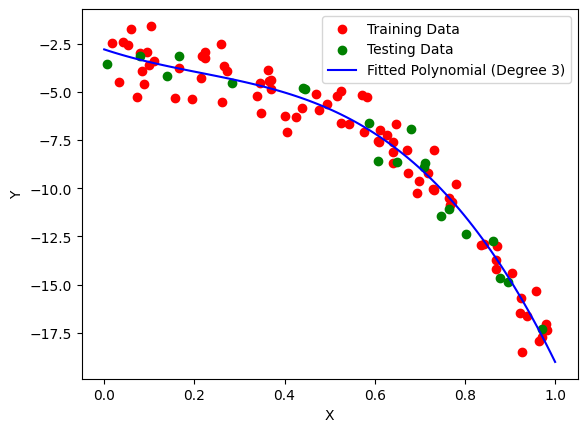

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics and best degree
print("Best Degree:", best_degree)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", round(r2 * 100, 2), "%")

# Plot the generated data and the fitted polynomial line
plt.scatter(X_train, y_train, color="red", label="Training Data")
plt.scatter(X_test, y_test, color="green", label="Testing Data")
plt.plot(
    x_line, y_line, color="blue", label=f"Fitted Polynomial (Degree {best_degree})"
)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()